In [17]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from skimage import color
from skimage.feature import hog
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam, SGD

In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [4]:
directory = '/content/drive/MyDrive/yalefaces'

data_set =tf.keras.preprocessing.image_dataset_from_directory(
    directory, labels='inferred', label_mode='int',
    class_names=['subject_1', 'subject_10', 'subject_11', 'subject_12', 'subject_13', 'subject_14', 'subject_15', 'subject_2', 'subject_3', 'subject_4', 'subject_5', 'subject_6', 'subject_7', 'subject_8', 'subject_9'],
    color_mode='grayscale', batch_size=1, image_size=(128, 128), shuffle=True, seed=None, validation_split=None, subset=None,
)

Found 1500 files belonging to 15 classes.


In [7]:
lst = list(data_set)

In [8]:
data, label = map(np.array,zip(*lst))

In [9]:
data = data.astype('uint8').reshape(1500,128,128)

In [10]:
label = tf.keras.utils.to_categorical(label, num_classes=15)

In [12]:
hog_images = []
hog_features = []
for image in data:
    fd,hog_image = hog(image, orientations=8, pixels_per_cell=(4,4),cells_per_block=(3, 3),block_norm= 'L2',visualize=True)
    hog_images.append(hog_image)
    hog_features.append(fd)

In [13]:
hog_features = np.array(hog_features)

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(hog_features, label, stratify=label, test_size=0.2)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=1)

In [15]:
X_train.shape

(960, 64800)

In [18]:
inputs = layers.Input(shape=(64800))
x = layers.Dense(1024, activation="relu")(inputs)
x = layers.Dense(512, activation="relu")(x)
x = layers.Dense(256, activation="relu")(x) 
x = layers.Dense(128, activation="relu")(x)
outputs = layers.Dense(15, activation="softmax")(x) 

model = Model(inputs=inputs, outputs=outputs, name="Unisys_Model")

In [19]:
model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

history = model.fit(x=X_train, y=y_train, epochs=34, batch_size=1, validation_data=(X_val, y_val))

Epoch 1/34
960/960 [==============================] - 17s 15ms/step - loss: 1.6787 - accuracy: 0.5063 - val_loss: 0.9524 - val_accuracy: 0.6875
Epoch 2/34
960/960 [==============================] - 14s 15ms/step - loss: 0.6032 - accuracy: 0.8354 - val_loss: 0.3773 - val_accuracy: 0.8792
Epoch 3/34
960/960 [==============================] - 14s 15ms/step - loss: 0.3361 - accuracy: 0.9302 - val_loss: 0.7983 - val_accuracy: 0.8125
Epoch 4/34
960/960 [==============================] - 14s 15ms/step - loss: 0.2829 - accuracy: 0.9500 - val_loss: 0.1273 - val_accuracy: 0.9708
Epoch 5/34
960/960 [==============================] - 14s 15ms/step - loss: 0.0915 - accuracy: 0.9854 - val_loss: 1.7158 - val_accuracy: 0.8000
Epoch 6/34
960/960 [==============================] - 14s 15ms/step - loss: 0.2935 - accuracy: 0.9573 - val_loss: 0.6660 - val_accuracy: 0.8792
Epoch 7/34
960/960 [==============================] - 14s 15ms/step - loss: 0.2859 - accuracy: 0.9604 - val_loss: 0.1894 - val_accuracy:

In [20]:
model.evaluate(X_test, y_test)

10/10 [==============================] - 0s 7ms/step - loss: 0.2692 - accuracy: 0.9567


[0.26919373869895935, 0.9566666483879089]

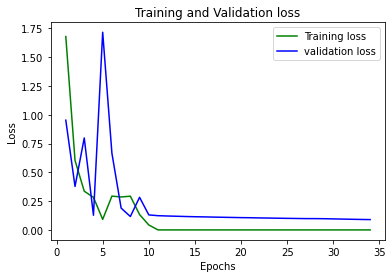

In [28]:
loss_train = history.history['loss']
loss_val = history.history['val_loss']
epochs = range(1,35)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

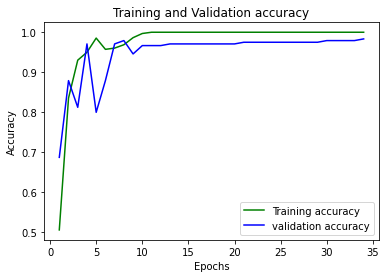

In [30]:
loss_train = history.history['accuracy']
loss_val = history.history['val_accuracy']
epochs = range(1,35)
plt.plot(epochs, loss_train, 'g', label='Training accuracy')
plt.plot(epochs, loss_val, 'b', label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()